# 使用线性回归预测california房价

Epoch 1, loss: 0.10752301663160324
Epoch 2, loss: 0.04996239393949509
Epoch 3, loss: 0.03636961057782173
Epoch 4, loss: 0.08036888390779495
Epoch 5, loss: 0.10994130373001099
Epoch 6, loss: 0.023163773119449615
Epoch 7, loss: 0.04042784124612808
Epoch 8, loss: 0.024155618622899055
Epoch 9, loss: 0.03065343014895916
Epoch 10, loss: 0.08813736587762833
Epoch 11, loss: 0.02415960654616356
Epoch 12, loss: 0.41104644536972046
Epoch 13, loss: 0.04173103719949722
Epoch 14, loss: 31.86807632446289
Epoch 15, loss: 0.0855650007724762
Epoch 16, loss: 0.025555001571774483
Epoch 17, loss: 0.032673854380846024
Epoch 18, loss: 0.030547505244612694
Epoch 19, loss: 0.1411362588405609
Epoch 20, loss: 0.05661556124687195
Epoch 21, loss: 0.02831484004855156
Epoch 22, loss: 0.061470575630664825
Epoch 23, loss: 0.04026811197400093
Epoch 24, loss: 0.038046032190322876
Epoch 25, loss: 0.05786434933543205
Epoch 26, loss: 0.021518928930163383
Epoch 27, loss: 0.03635339438915253
Epoch 28, loss: 0.053936429321765

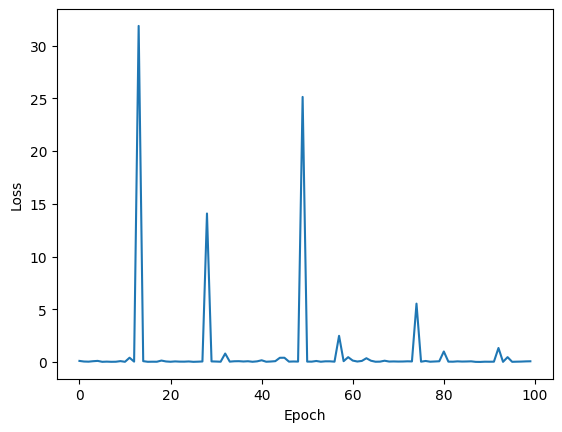

In [23]:
from sklearn.datasets import fetch_california_housing
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
import torch

class CaliforniaHousing(Dataset):
    def __init__(self):
        california_housing = fetch_california_housing()
        self.X = torch.tensor(california_housing.data, dtype=torch.float32)
        self.y = torch.tensor(california_housing.target.reshape(-1, 1), dtype=torch.float32)

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

class LinearRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

def train(model, dataset):
    num_epochs = 100
    batch_size = 16
    loss_function = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    losses = []
    for epoch in range(num_epochs):
        model.train()
        for X, y in DataLoader(dataset, batch_size, shuffle=True):
            # forward pass
            y_pred = model(X)
            loss = loss_function(y_pred, y)

            # backward pass
            optimizer.zero_grad() # clear last step gradient
            loss.backward() # backword pass, compute gradient
            optimizer.step() # update parameters

        avg_loss = loss.item()/batch_size
        losses.append(avg_loss)
        print(f'Epoch {epoch+1}, loss: {avg_loss}')
    
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()


if __name__ == "__main__":
    model = LinearRegression(8, 1)
    dataset = CaliforniaHousing()

    train(model, dataset)



In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
print(california_housing.target.reshape(-1, 1).shape)

(20640, 1)
